<a href="https://colab.research.google.com/github/amrtariq/Egyptian-id-reader/blob/master/Tesseract_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Optical Character Recognition using Tesseract

# By Suyesha Bhattacharjee


# IoT and Computer Vision Intern

Optical Character Recognition(OCR) has been a popular task in Computer Vision. Tesseract is the most open-source software available for OCR. It was initially developed by HP as a tool in C++.
Since 2006 it is developed by Google. The original software is available as a command-line tool for windows. We are living in a python world. Because of its popularity,the tool is also available in python--developed and maintained as an opensource project.

### Step1. Install Pytesseract and tesseract-OCR in Google Colab.

In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 9 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (26.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debcon

In [2]:
!pip install pytesseract

### Step2. import libraries

In [3]:
import cv2
import numpy as np
#import pytesseract
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image

## Step3. Preprocessing

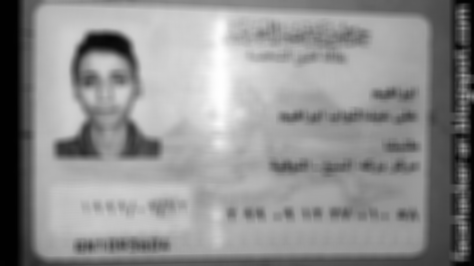

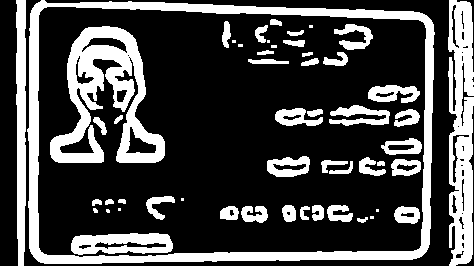

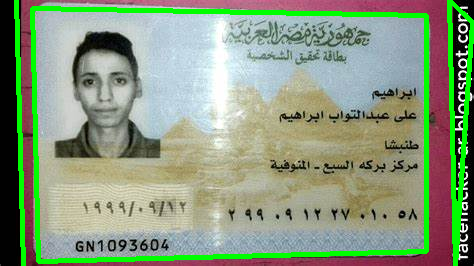

[array([[32,  8]], dtype=int32), array([[ 38, 261]], dtype=int32), array([[426,  15]], dtype=int32), array([[426, 251]], dtype=int32)]
[[ 32   8]
 [ 38 261]
 [426  15]
 [426 251]]


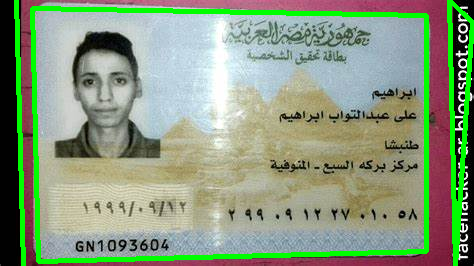

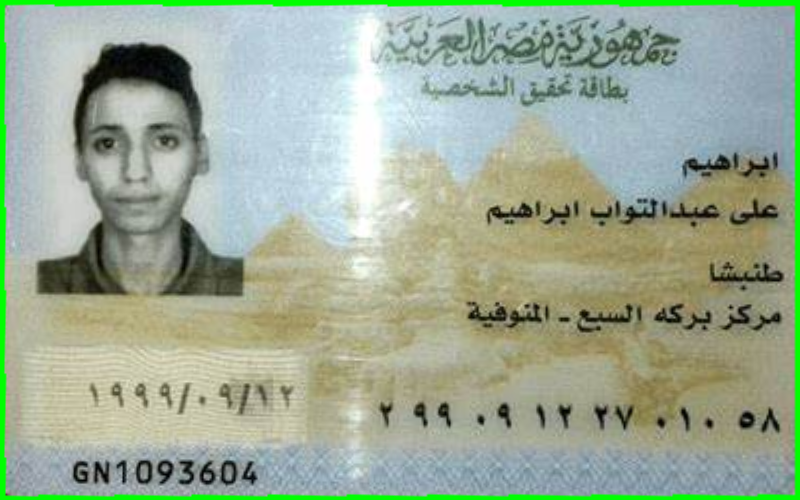

In [4]:
from google.colab.patches import cv2_imshow

# Test the function with an example
#corners = [[515, 216], [26, 204], [21, 515], [504, 521]]
#sorted_corners = sort_corners(corners)
#print(sorted_corners)
# Define a function that returns the squared distance from the origin
def distance_from_origin(point):
    x, y = point[0][0], point[0][1] # Extract the x and y values from the nested list
    return x**2 + y**2 # Use Pythagoras' theorem to calculate the squared distance


# Sort the points by their distance from the origin, in ascending order
#sorted_points = sorted(points, key=distance_from_origin)

# Print the sorted points
#print(sorted_points)

#4,10,7,5
# Read the image and convert to grayscale
img = cv2.imread('/content/id_5.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
#ray = cv2.equalizeHist(gray)

#b, g, r = cv2.split(img)

#hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Extract the hue channel
##hue = hsv[:, :, 2]
#gray = hue
# Apply adaptive thresholding to binarize the image
blurred = cv2.blur(gray, (9, 9))
cv2_imshow(blurred)
##thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 5)
#thresh = cv2.Canny(gray, 20, 50)


##thresh = cv2.bitwise_not(thresh)

# Define the kernel
kernel = np.ones((3, 3), np.uint8)

# Apply close morphology
#closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=1)

# Apply dilation

##dilation = cv2.medianBlur(thresh,7)
##dilation = cv2.dilate(dilation, kernel, iterations=3)
#dilation = cv2.erode(thresh, kernel, iterations=1)
#dilation = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
#dilation = thresh

# Define the Sobel kernels
#sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
#sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Define the Prewitt kernels
#prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
#prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Apply the Sobel kernels
#sobel_x_img = cv2.filter2D(blurred, -1, sobel_x)
#sobel_y_img = cv2.filter2D(blurred, -1, sobel_y)
#thresh = cv2.addWeighted(sobel_x_img, 0.5, sobel_y_img, 0.5, 0)
## Method 2:

# Apply Sobel in x and y directions
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=9)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=9)

# Compute the gradient magnitude
sobel = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize and convert to uint8
thresh = (sobel * 255 / sobel.max()).astype(np.uint8)
erode = cv2.erode(thresh, kernel, iterations=1)
dilation = cv2.dilate(erode, kernel, iterations=1)

#dilation = cv2.erode(thresh, kernel, iterations=1)
#dilation = cv2.dilate(thresh, kernel, iterations=3)
#blurred = cv2.blur(thresh, (5, 5))
# Set the threshold value and maximum value
threshold = 50
max_val = 255

# Apply binary thresholding
ret, img_bin = cv2.threshold(dilation, threshold, max_val, cv2.THRESH_BINARY)

cv2_imshow(img_bin)
# Find the contours in the image
contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#blurred
# Sort the contours by area in descending order
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Assume the largest contour is the ID card and get its four corners
for i in range(len(contours)):
  cnt = contours[i]
  peri = cv2.arcLength(cnt, True)
  approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
  #print(i)
  # Draw the contour on the original image (for visualization)
  cv2.drawContours(img, [approx], -1, (0, 255, 0), 3)

# Show the original and warped images
cv2_imshow(img)

cnt = contours[0]
#print(contours)
#print(cnt)
# Find the minimum area bounding rectangle of the contour
rect = cv2.minAreaRect(cnt)

##print(rect)
# Get the four vertices of the rectangle
approx = cv2.boxPoints(rect)
# Convert to float32
approx = np.float32(approx)
#print(approx)
peri = cv2.arcLength(cnt, True)
pprox = cv2.approxPolyDP(cnt, 0.02 * peri, True)

# Draw the contour on the original image (for visualization)
#cv2.drawContours(img, [approx], -1, (255, 0, 0), 3)
# Define the four points of the destination rectangle (for warping)
dst = np.array([[0, 0], [0, 500], [800, 0], [800, 500]], dtype='float32')

# Get the bounding box around the ID card
x, y, w, h = cv2.boundingRect(cnt)
id_card = img[y:y+h, x:x+w]
#cv2_imshow(id_card)

# Get the four vertices of the rectangle as a list of tuples
#approx = cv2.boxPoints(rect)
# Convert to a numpy array
#pprox = sort_corners(pprox)

# Compute the perspective transform matrix and warp the image
#M = cv2.getPerspectiveTransform(pprox.astype('float32'), dst, cv2.RANSAC)
# Find the homography matrix and the mask using RANSAC
# Get the x and y coordinates as separate arrays
#x = pprox[:, 0]
###y = pprox[:, 1]

# Use np.lexsort() to get the sorted indices by x and then y
#indices = np.lexsort((x, y))

# Use the indices to reorder the original array
#prox = pprox[indices]
sorted_points = sorted(pprox, key=distance_from_origin)
print(sorted_points)
pprox = np.concatenate(sorted_points, axis=0)
M, mask = cv2.findHomography(pprox.astype('float32'), dst, cv2.RANSAC)
print(pprox)
warped = cv2.warpPerspective(img, M, (800, 500))

cv2_imshow(img)
cv2_imshow(warped)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

## Step4. Text Extraction

In [5]:
# Define a function that takes an image and four coordinates as parameters
def draw_and_crop_roi(image, x1, y1, x2, y2):
    # Make a copy of the original image
    image_copy = image.copy()
    # Draw a rectangle over the region of interest (ROI) with a green border
    cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
    # Crop the ROI from the original image
    roi = image[y1:y2, x1:x2]
    # Return the image with the rectangle and the cropped ROI
    return image_copy, roi

In [6]:
!sudo apt-get install tesseract-ocr-ara

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ara
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 645 kB of archives.
After this operation, 1,447 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ara all 1:4.00~git30-7274cfa-1.1 [645 kB]
Fetched 645 kB in 1s (952 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-ara.
(Reading databas

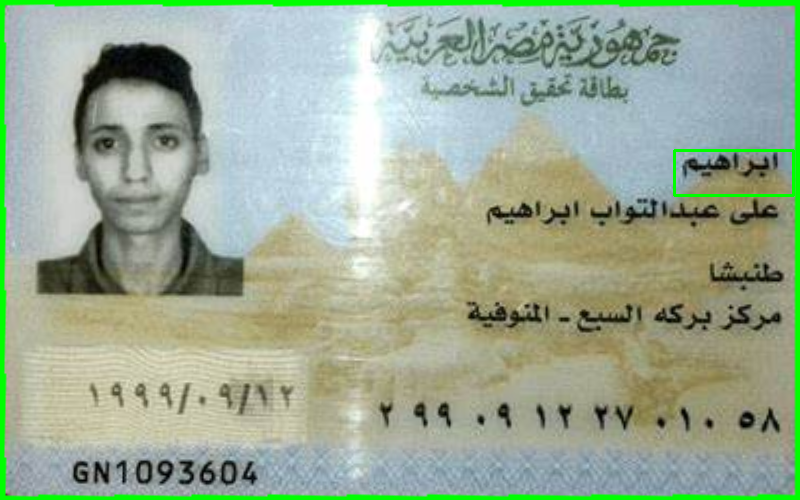

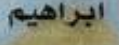

In [7]:
overlayed, cropped =draw_and_crop_roi(warped,674,150,793,195)
cv2_imshow(overlayed)
cv2_imshow(cropped)

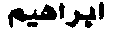

True

In [8]:
grayCropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
thCropped = cv2.adaptiveThreshold(grayCropped, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 91, 21)
cv2_imshow(thCropped)
cv2.imwrite('thCoropped.png',thCropped)

In [9]:
!sudo apt-get install tesseract-ocr-ara

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ara is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


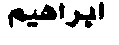

ايراهيم



'ايراهيم\n\x0c'

In [10]:
import pytesseract
#TESSDATA_PREFIX = '/usr/share/tesseract-ocr/4.00'
#cv2.imread('/content/thCoropped.png')
extractedInformation = pytesseract.image_to_string(thCropped, config='-c tessedit_create_utf8=1 --psm 10', lang='ara')
cv2_imshow(cv2.imread('/content/thCoropped.png'))
print(extractedInformation)
#extractedInformation

In [ ]:
#extractedInformation = pytesseract.image_to_string(Image.open('/content/12.jpg'))

### Step5. Printing the extracted information

In [ ]:
print(extractedInformation)

B. a 3171-2367 |
P.O. 10720
oes Do 10/5055



In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 13.9 MB/s eta 0:00:00


In [ ]:
import easyocr
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [ ]:
text_reader = easyocr.Reader(['en'])

B.Nq
E.0.
P
0.40/2022
3171/2367
10/2027


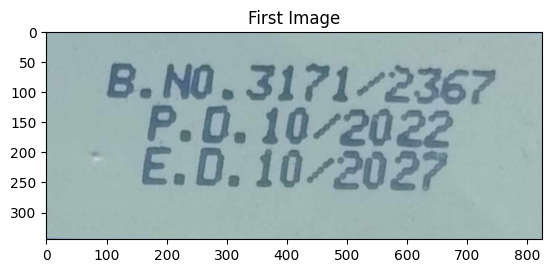

In [ ]:
x = Image.open('/content/12.jpg')
results = text_reader.readtext(x)
results2 = sorted(results, key=lambda x: x[0][0])
for (bbox, text, prob) in results2:
    print(text)
plt.imshow(x)
plt.title("First Image");

In [ ]:
!pip install keras-ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
import keras_ocr

In [ ]:
pipline = keras_ocr.pipeline.Pipeline() #Creting a pipline


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


1/1 [==============================] - 5s 5s/step


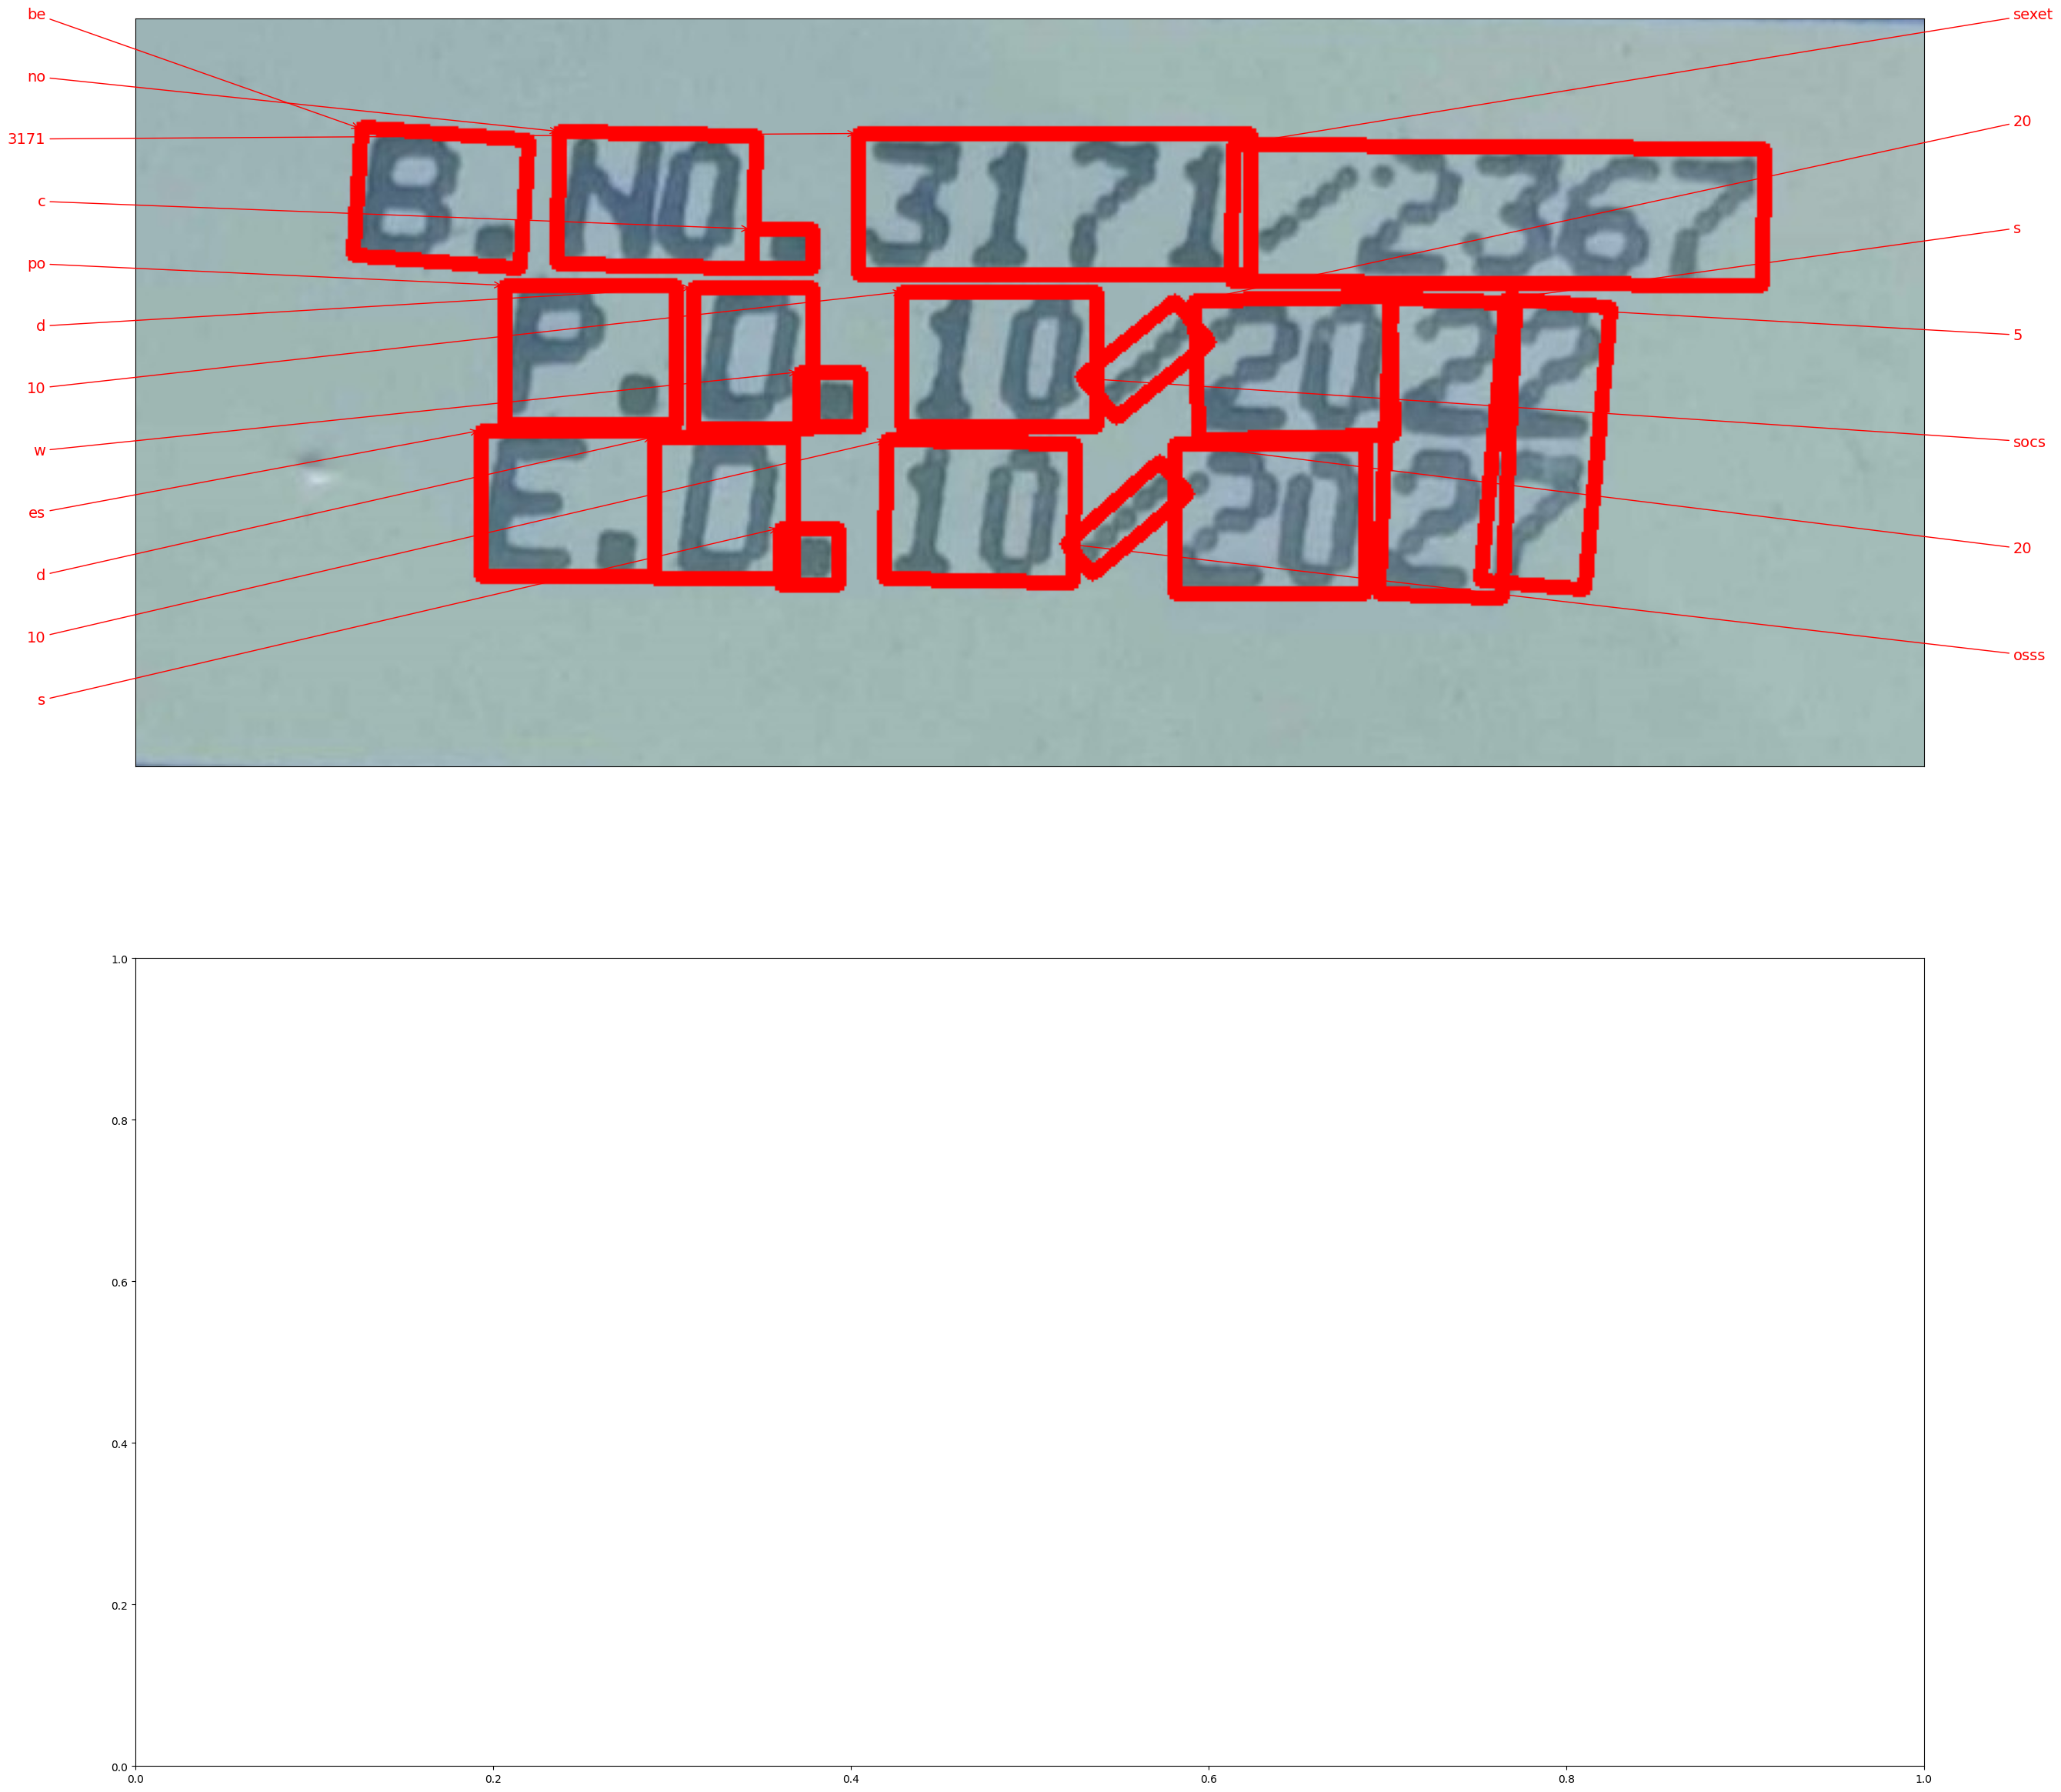

In [ ]:
image = keras_ocr.tools.read('/content/12.jpg')
images = [image]
kerasocr_preds = pipline.recognize(images)
fig,axs = plt.subplots(nrows = 2 , figsize = (30,30))
for ax , image,  prediction in zip(axs , images , kerasocr_preds):
    keras_ocr.tools.drawAnnotations(image, prediction, ax)

Tesseract:
 

MFG os/2022



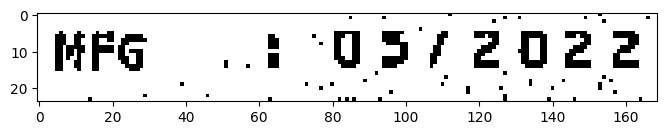

In [ ]:
import cv2
import easyocr
from pylab import rcParams
# import numpy library
import numpy as np

# define the path
path = '/content/135.png'

# read the image
img = cv2.imread(path, 0)

# find the white rectangle
th = img.copy()
th[th<200] = 0


# histogram equalization
#equ = cv2.equalizeHist(img)
# Gaussian blur
#blur = cv2.GaussianBlur(equ, (5, 5), 1)

# manual thresholding
th2 = 20 # this threshold might vary!
#equ[equ>=th2] = 255
#equ[equ<th2]  = 0
#th = 255-img
th=img
equ = cv2.adaptiveThreshold(th, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,3,3)
#55,45

plt.imshow(equ,cmap='gray')
# Now apply the OCR on the processed image
rcParams['figure.figsize'] = 8, 16
reader = easyocr.Reader(['en'])

#output = reader.readtext(equ)
extractedInformation = pytesseract.image_to_string(equ)
print("Tesseract:\r\n"+extractedInformation)

#for i in range(len(output)):
    #print(output[i][-2])